Importing all the needed modules for the project

In [ ]:
import numpy as np
import sep
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams
from astropy.io import fits

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD      
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD      


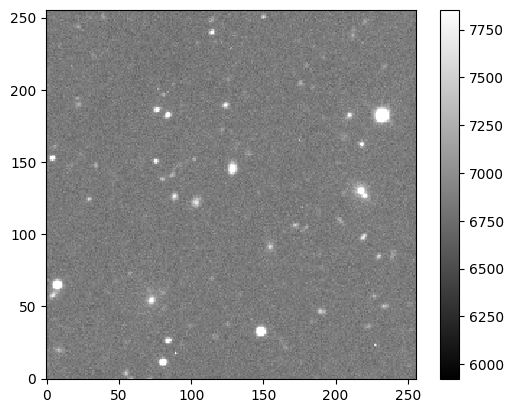

In [ ]:
#astropy way to open fits image
fdata_image = "image.fits"
hdu1 = fits.open(fdata_image)
#get the first header data unit which has a header and then some data on it
data_1 = hdu1[0].data

#pulled from the tutorial
m, s = np.mean(data_1), np.std(data_1)
plt.imshow(data_1, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('image_1.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# measure a spatially varying background on the image
bkg = sep.Background(data_1)

In [ ]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [ ]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

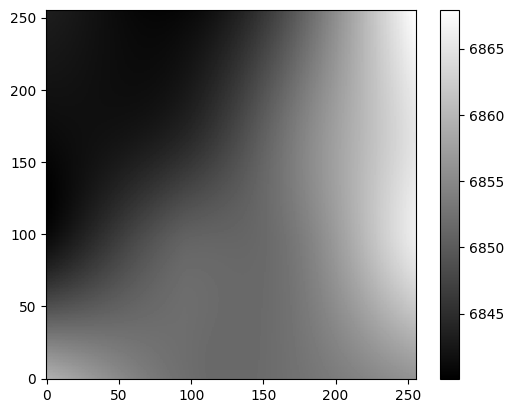

In [ ]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('image_2.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

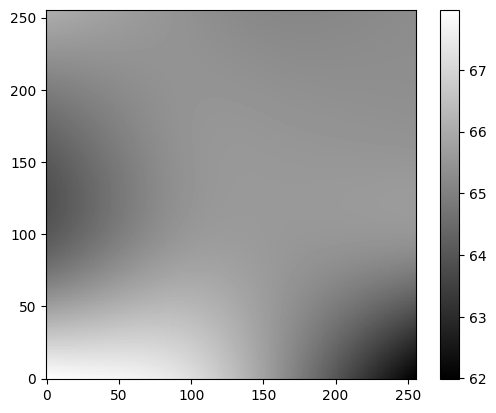

In [ ]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('image_3.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# subtract the background
data_sub = data_1 - bkg

In [ ]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [ ]:
# how many objects were detected
len(objects)

69

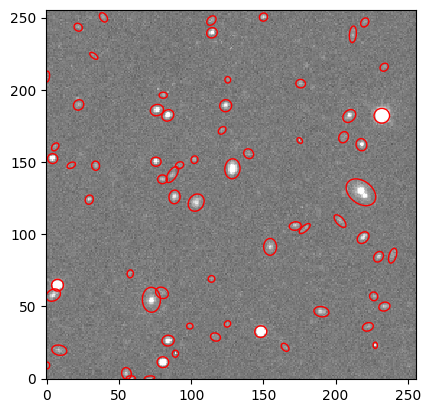

In [ ]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('image_4.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [ ]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


Part 2 of the project

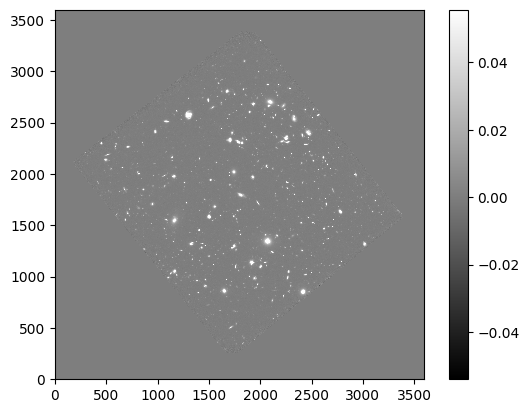

In [ ]:
#astropy way to open fits image
fdata_image = "f105w.fits"
hdu2 = fits.open(fdata_image)
#get the first header data unit which has a header and then some data on it
data_2 = hdu2[0].data

#pulled from the tutorial
m, s = np.mean(data_2), np.std(data_2)
plt.imshow(data_2, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('image_5.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# measure a spatially varying background on the image
data_2 = data_2.byteswap().newbyteorder()
bkg2 = sep.Background(data_2)

In [ ]:
# get a "global" mean and noise of the image background:
print(bkg2.globalback)
print(bkg2.globalrms)

0.0
0.0005398219218477607


In [ ]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg2.back()
# bkg_image = np.array(bkg) # equivalent to above

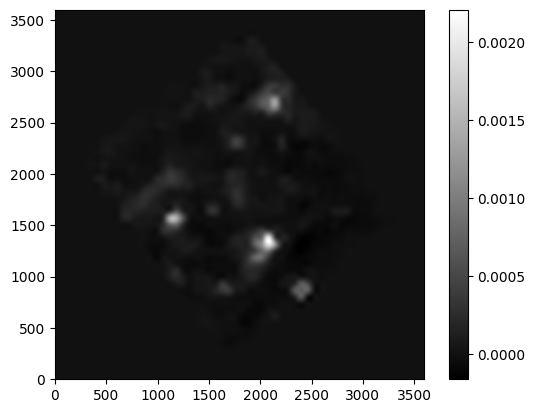

In [ ]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('image_6.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg2.rms()

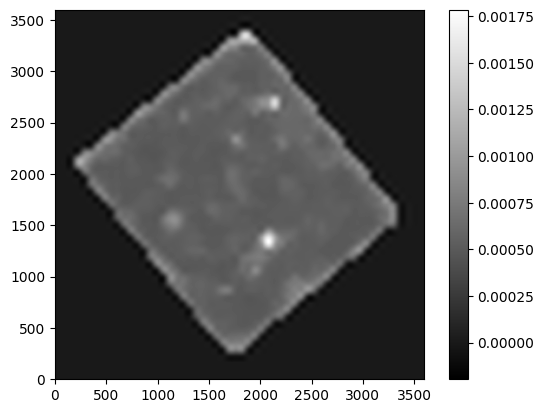

In [ ]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('image_7.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# subtract the background
data_sub = data_2 - bkg2
print(data_sub)

[[-9.7810633e-43 -9.6549464e-43 -9.5148166e-43 ...  1.5258038e-26
   1.4571698e-26  1.3862292e-26]
 [-9.6689594e-43 -9.5428425e-43 -9.4167257e-43 ...  1.5084355e-26
   1.4405831e-26  1.3704498e-26]
 [-9.5428425e-43 -9.4167257e-43 -9.2765958e-43 ...  1.4881801e-26
   1.4212388e-26  1.3520472e-26]
 ...
 [ 4.0393503e-23  3.9892450e-23  3.9315786e-23 ...  1.2952326e-22
   1.2369704e-22  1.1767497e-22]
 [ 3.8646630e-23  3.8167239e-23  3.7615516e-23 ...  1.2392182e-22
   1.1834756e-22  1.1258593e-22]
 [ 3.6838264e-23  3.6381312e-23  3.5855401e-23 ...  1.1812333e-22
   1.1280990e-22  1.0731786e-22]]


In [ ]:
objects = sep.extract(data_sub, 0.00013, err=bkg.globalrms)

In [ ]:
# how many objects were detected
len(objects)

1124

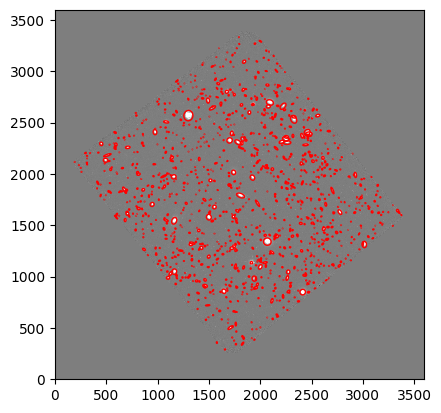

In [ ]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('image_8.png', bbox_inches = "tight", facecolor = "white")

In [ ]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [ ]:
# show the all the objects results and then saving them into an np array
x = []

for i in range(1355):
    #print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
    x.append(flux[i])

flux_data = np.array([x])


In [ ]:
#plotting histogram
plt.hist(flux_data, bins = 120, alpha = 0.5, edgecolor = "black")
plt.ylabel("N per bin")
plt.xlabel("x")
plt.savefig("hubble_hist.png", bbox_inches = "tight", facecolor = "white")

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7ddcc45b2050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7ddcc45b12d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#printing the data of the fluxes
print(f'mean of fluxes: {np.mean(flux_data)}')
print(f'median of fluxes: {np.median(flux_data)}')
print(f'std of fluxes: {np.std(flux_data)}')
print(f'outlier of fluxes: {np.max(flux_data)}')

mean of fluxes: 2.1474323387894905
median of fluxes: 0.3794036000221969
std of fluxes: 23.21541094896019
outlier of fluxes: 805.4553882980348


# Three color False Image

In [ ]:
#file names
fdata_F105W = "f105w.fits"
fdata_F125W = "f125w.fits"
fdata_F160W = "f160w.fits"

#open the files
hdu1 = fits.open(fdata_F105W)
hdu2 = fits.open(fdata_F125W)
hdu3 = fits.open(fdata_F160W)

#get the first header data unit which has a header and then some data on it
data_1 = hdu1[0].data
data_2 = hdu2[0].data
data_3 = hdu3[0].data

In [ ]:
f = plt.figure(figsize = (10,10))

<Figure size 1000x1000 with 0 Axes>